In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot parameters

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 40,
          'figure.figsize': (20, 15),
          'axes.labelsize': 42,
          'axes.titlesize': 42,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42}
pylab.rcParams.update(params)

In [3]:
fig_width = 10
fig_height = 10
dpi = 300

## Helper functions

In [4]:
def process_txt(dset, filename):
    data = np.loadtxt(filename + ".kcore.txt").astype(int)
    num_shells = max(data[:,1]) + 1
    dset[filename] = [[] for i in range(num_shells)]
    for line in data:
        dset[filename][line[1]].append(line[0])
        
    return dset

In [5]:
def process_unitigs_fasta(dset, filename):
    with open(filename + ".final.unitigs.fa", "r") as f:
        dset[filename] = []
        i = 0
        for line in f:
            if i % 2 == 1:
                dset[filename].append(line)
            i += 1
            
    return dset

In [6]:
def autolabel(ax, rects, labels, thr):
    """
    Attach a text label next to a bar displaying a custom label
    """
    for i in range(len(rects)):
        width = rects[i].get_width()
        if width >= thr:
            ax.text(width + 10, rects[i].get_y() + rects[i].get_height() / 2.,
                    "{}".format(labels[i]),
                    ha='left', va='center')

In [7]:
def autolabel_hor(ax, xs, ys, thr, h, fs, r, c):
    """
    Attach a text label next to a point displaying a custom label
    """
    for i in range(len(xs)):
        if ys[i] >= thr:
            ax.scatter(xs[i], ys[i], linewidth = r, color = c)
            ax.text(xs[i], ys[i] + h,
                    "{}".format(xs[i]),
                    ha='center', va='center', fontsize = fs)

In [8]:
def find_repeat_in_seq(repeat, seq):
    coords = []
    for i in range(len(seq) - len(repeat)):
        if (seq[i:i+len(repeat)] == repeat):
            coords.append((i, i + len(repeat)))
    return coords       

In [9]:
def parse_coords(fname, unitig_cs):
    with open(fname + ".coords", "r") as f:
        # Skip header
        for _ in range(5):
            next(f)
            
        for line in f:
            coords_ref, _, _, _, which = line.split("|")
            unitig = int(which.split()[1])
            unitig_cs[fname][unitig - 1].append(coords_ref.split())

## Data

In [14]:
dataset = {"../Data/1gen2rep_noerror_abyss/seq2a_415": None, "../Data/1gen2rep_noerror_abyss/seq2b_415": None, "../Data/1gen2rep_noerror_abyss/seq2d_415": None,
           "../Data/1gen2rep_extra_noerr/seq2l_415": None, "../Data/1gen2rep_extra_filter/seq2l_415": None,
           "../Data/1gen2rep_extra_error_1/seq2l_415": None, "../Data/1gen2rep_extra_cor/seq2l_415": None,
           "../Data/1gen2rep_extra_noerr_var/seq2l_415": None, "../Data/1gen2rep_extra_filter_var/seq2l_415": None,
           "../Data/1gen2rep_extra_error_var/seq2l_415": None, "../Data/1gen2rep_extra_cor_var/seq2l_415": None,
           "../Data/ecoli_300_noerr/seq1_42": None, "../Data/ecoli_300_filter/seq1_42": None, 
           "../Data/ecoli_300_error/seq1_42": None, "../Data/ecoli_300_cor/seq1_42": None,
           "../Data/2bact_noerr/seq1_42": None, "../Data/2bact_noerr/seq2_42": None,
           "../Data/2bact_noerr/2bact_42": None, "../Data/2bact_2/2bact_clean_42": None,
           "../Data/2bact_2/2bact_clean_42": None,
           "../Data/2bact_2/2bact_42": None,
           "../Data/shakya/SRR606249": None,
           "../Data/shakya/SRR606249_nouni": None,
           "../Data/shakya_k25/SRR606249": None,
           "../Data/3bact_noerr/3bact_42": None, "../Data/3bact_filter/3bact_42": None, 
           "../Data/3bact_error/3bact_42": None, "../Data/3bact_cor/3bact_42": None,
           "../Data/ecoli_300_noerr/seq_all_42": None, "../Data/ecoli_300_filter/seq_all_42": None, 
           "../Data/ecoli_300_error/seq_all_42": None, "../Data/ecoli_300_cor/seq_all_42": None,
           "../Data/ecoli_no_unitig_filter/seq_all_42": None,
           }
for fname in dataset:
    dataset = process_txt(dataset, fname)

In [15]:
dataset_sizes = {}
for fname in dataset:
    dataset_sizes[fname] = [len(core) for core in dataset[fname]]

In [16]:
repeats = {"../Data/2bact/seq1_42": [],
           "../Data/2bact/seq2_42": [],
           "../Data/2bact/2bact_42": [],}

repeats["../Data/2bact/seq1_42"].append("TCATTCAATGTTTTCACCCTGAGCCGGGCCAACGGACAATTTGCCCCTGGTGTCTCCATATTAATGCACGGGAGAGCCTCTCACTTGACGCCGGGGGCGATGGCGGGCGTCTCGTCAGCACAGTACGACCCAAATAAATACACCCTTTACTTATAGTGACTACCGACTTGCATCCGTTATATGTAAGTTGTTATTGGCATTCTACACCGATTATTACACTTTGCGGAGAAGCCCCCGGTCGTCATGAAATGACAATTGCTAGAATGCCTTGCCCACAGAGCCGTGTAAACATAGGCGTACAATGGACGCGCTCTTCTATGCACGGGTTCCAACTGCATCCTCTGTTTCCTCAACCTGCATCAAGTTGGTTCCGCACCAGACGCAACTTAATTCCTCCGCA")
repeats["../Data/2bact/seq1_42"].append("AGAAGCCAGATTACCAATCATCGTCCTGTCAATCACTACATCATAAGGTGTGATTATTGTCAGGCAAGTGACGAGTGGAAAGTCCAAGCATTAACCGCTTACGTTGGTTGTAAGCGGCCCATATATACGATCAACAGAGGCACAATACGATCACTTCAGTAAGTTAAGGTCTATCGCCCGCCCACGCCGCGCGCCAACCTGTAAAACACCAAGTAGGTCATAGGCGGTAATCAGAGCTATAGTAGTTAAAGATTAACTGCAATAGTATAAAGGTAAGAGATAACGAACCGCTCTGGGGGTTGCAGCAGGTAACTTTTAAGGTTTGCCGGGGGGTTTTGCAGACTCGTGTAAACGCAGACCCAGGAGAGTTCTTTATTCTTGCCCCCCATCTTACGAGTTAAGCGAGAGAAACGGGAGGATAGATAGTCGTTCAAGCACATACTTTCGGGCTGCGAGGTCTTTTTGTTCAGGGTTTCATACGTAATGGGCAAACACGTAAG")
repeats["../Data/2bact/seq2_42"].append("CCTACCGCCGTCGATAAGCGGGGTCAACACAGACCCCCTTACACCTTGTGGGGGATGCTTGAGACTCAACACTCTCACACCGAGAGTCAACAAGATTCACTAACTACTCGAGTGGTCGCGCTGTGTTGGGACAATGCTAGTGTGACACGTACACACCGCGCTTTCGGCTTGTAGTGAGGGGACGGTGTCAACACCCATCGACCGTTTCCCAGCGGTACTTCGTGAGAGTTACAAGGATGCGGCACAAACATCTAGATTCGCTAGAAGCATAGGGCACCGGCATCAGGATGGGACGCTGGTGCACAACCCCTGACCCTCCCGTCAAATTACTAACGTCAACTGGATGTTAGCAGGGGGTATCGAGATACCAAAACGAACCTATCCGATCCTGCACATATAT")
repeats["../Data/2bact/seq2_42"].append("AGAAGCCAGATTACCAATCATCGTCCTGTCAATCACTACATCATAAGGTGTGATTATTGTCAGGCAAGTGACGAGTGGAAAGTCCAAGCATTAACCGCTTACGTTGGTTGTAAGCGGCCCATATATACGATCAACAGAGGCACAATACGATCACTTCAGTAAGTTAAGGTCTATCGCCCGCCCACGCCGCGCGCCAACCTGTAAAACACCAAGTAGGTCATAGGCGGTAATCAGAGCTATAGTAGTTAAAGATTAACTGCAATAGTATAAAGGTAAGAGATAACGAACCGCTCTGGGGGTTGCAGCAGGTAACTTTTAAGGTTTGCCGGGGGGTTTTGCAGACTCGTGTAAACGCAGACCCAGGAGAGTTCTTTATTCTTGCCCCCCATCTTACGAGTTAAGCGAGAGAAACGGGAGGATAGATAGTCGTTCAAGCACATACTTTCGGGCTGCGAGGTCTTTTTGTTCAGGGTTTCATACGTAATGGGCAAACACGTAAG")
repeats["../Data/2bact/2bact_42"].append("TCATTCAATGTTTTCACCCTGAGCCGGGCCAACGGACAATTTGCCCCTGGTGTCTCCATATTAATGCACGGGAGAGCCTCTCACTTGACGCCGGGGGCGATGGCGGGCGTCTCGTCAGCACAGTACGACCCAAATAAATACACCCTTTACTTATAGTGACTACCGACTTGCATCCGTTATATGTAAGTTGTTATTGGCATTCTACACCGATTATTACACTTTGCGGAGAAGCCCCCGGTCGTCATGAAATGACAATTGCTAGAATGCCTTGCCCACAGAGCCGTGTAAACATAGGCGTACAATGGACGCGCTCTTCTATGCACGGGTTCCAACTGCATCCTCTGTTTCCTCAACCTGCATCAAGTTGGTTCCGCACCAGACGCAACTTAATTCCTCCGCA")
repeats["../Data/2bact/2bact_42"].append("CCTACCGCCGTCGATAAGCGGGGTCAACACAGACCCCCTTACACCTTGTGGGGGATGCTTGAGACTCAACACTCTCACACCGAGAGTCAACAAGATTCACTAACTACTCGAGTGGTCGCGCTGTGTTGGGACAATGCTAGTGTGACACGTACACACCGCGCTTTCGGCTTGTAGTGAGGGGACGGTGTCAACACCCATCGACCGTTTCCCAGCGGTACTTCGTGAGAGTTACAAGGATGCGGCACAAACATCTAGATTCGCTAGAAGCATAGGGCACCGGCATCAGGATGGGACGCTGGTGCACAACCCCTGACCCTCCCGTCAAATTACTAACGTCAACTGGATGTTAGCAGGGGGTATCGAGATACCAAAACGAACCTATCCGATCCTGCACATATAT")
repeats["../Data/2bact/2bact_42"].append("AGAAGCCAGATTACCAATCATCGTCCTGTCAATCACTACATCATAAGGTGTGATTATTGTCAGGCAAGTGACGAGTGGAAAGTCCAAGCATTAACCGCTTACGTTGGTTGTAAGCGGCCCATATATACGATCAACAGAGGCACAATACGATCACTTCAGTAAGTTAAGGTCTATCGCCCGCCCACGCCGCGCGCCAACCTGTAAAACACCAAGTAGGTCATAGGCGGTAATCAGAGCTATAGTAGTTAAAGATTAACTGCAATAGTATAAAGGTAAGAGATAACGAACCGCTCTGGGGGTTGCAGCAGGTAACTTTTAAGGTTTGCCGGGGGGTTTTGCAGACTCGTGTAAACGCAGACCCAGGAGAGTTCTTTATTCTTGCCCCCCATCTTACGAGTTAAGCGAGAGAAACGGGAGGATAGATAGTCGTTCAAGCACATACTTTCGGGCTGCGAGGTCTTTTTGTTCAGGGTTTCATACGTAATGGGCAAACACGTAAG")

In [18]:
seqs = {}
for fname in ["../Data/2bact/2bact_42"]:
    with open(fname + ".fa", "r") as f:
        i = 0
        for line in f:
            if i % 2 == 1:
                seqs[fname] = line
            i += 1    

repeat_coords = {}
for fname in seqs:
    repeat_coords[fname] = []
    for repeat in repeats[fname]:
        repeat_coords[fname].append(find_repeat_in_seq(repeat, seqs[fname]))

for fname in repeat_coords:
    print("Repeat counts for {}: {}".format(fname.split("/")[1], 
          [len(coords) for coords in repeat_coords[fname]]))

Repeat counts for Data: [200, 400, 1000]


In [19]:
unitig_coords = {"../Data/2bact_noerr/seq1_42": [[] for i in range(2393)],
                 "../Data/2bact_noerr/seq2_42": [[] for i in range(5126)],
                 "../Data/2bact_noerr/2bact_42": [[] for i in range(5126)],}

In [20]:
for fname in unitig_coords:
    parse_coords(fname, unitig_coords)

In [21]:
unitig_hit_types = {"../Data/2bact_noerr/seq1_42": [],
                    "../Data/2bact_noerr/seq2_42": [],
                    "../Data/2bact_noerr/2bact_42": [],}

In [22]:
fname = "../Data/2bact_noerr/2bact_42"
rname = "../Data/2bact/2bact_42"
for coords in unitig_coords[fname]:
    if (coords == []):
        unitig_hit_types[fname].append("NAN")
    else:
        flag = "N"
        for j in range(len(coords)):
            if (coords[j][0] > coords[j][1]):
                temp = coords[j][0]
                coords[j][0] = coords[j][1]
                coords[j][1] = temp
            for k in range(len(repeat_coords[rname])):
                for i in range(len(repeat_coords[rname][k])):
                    # is contained in a repeat
                    if ((int(coords[j][0]) >= repeat_coords[rname][k][i][0]) and 
                          (repeat_coords[rname][k][i][1] >= int(coords[j][1]))):
                        flag = str(k) + "R"
                        break
                    # overlaps a repeat
                    elif ((int(coords[j][0]) <= repeat_coords[rname][k][i][0] and 
                          repeat_coords[rname][k][i][0] <= int(coords[j][1])) or
                         ((int(coords[j][0]) <= repeat_coords[rname][k][i][1] and 
                          repeat_coords[rname][k][i][1] <= int(coords[j][1])))):
                        flag = str(k)
                        break
        unitig_hit_types[fname].append(flag)

In [23]:
dataset_sizes_types = {"../Data/2bact_noerr/2bact_42": [[], [], [], [], [], [], [], []],}

In [24]:
for fname in dataset_sizes_types:
    types = [(np.asarray(unitig_hit_types[fname])[np.asarray(core, dtype = int) - 1]) for core in dataset[fname][1:]]
    dataset_sizes_types[fname][0] = [np.count_nonzero(types[i] == "NAN") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][1] = [np.count_nonzero(types[i] == "0R") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][2] = [np.count_nonzero(types[i] == "1R") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][3] = [np.count_nonzero(types[i] == "2R") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][4] = [np.count_nonzero(types[i] == "0") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][5] = [np.count_nonzero(types[i] == "1") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][6] = [np.count_nonzero(types[i] == "2") 
                                               for i in range(len(dataset[fname]) - 1)]
    dataset_sizes_types[fname][7] = [np.count_nonzero(types[i] == "N") 
                                               for i in range(len(dataset[fname]) - 1)]

## Section 1: Simulated data

### Figure 1: Random background 200x400 + 400x200 (3 panels)

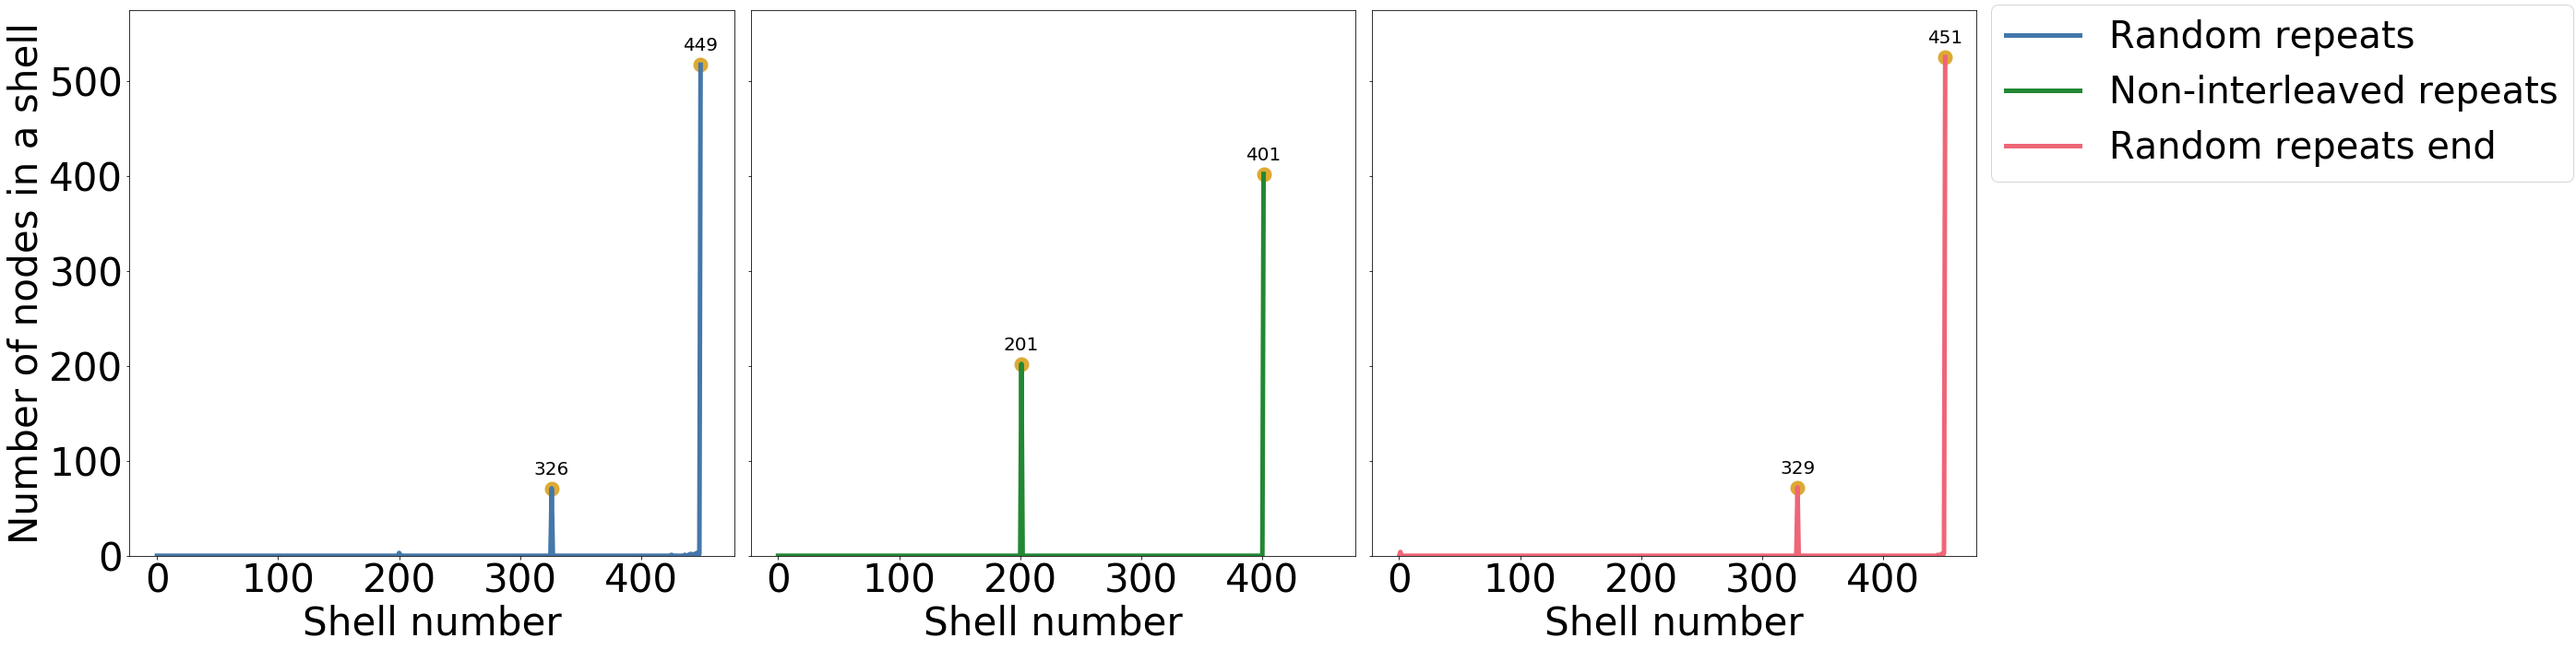

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(3 * fig_width, fig_height), sharex = True, sharey = True)

fname = "../Data/1gen2rep_noerror_abyss/seq2a_415"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

axes[0].plot(xs, data, label = "Random repeats", linewidth = 5, color = '#4477aa')
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')
axes[0].set_ylim((0,575))
autolabel_hor(axes[0], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = "../Data/1gen2rep_noerror_abyss/seq2b_415"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

axes[1].plot(xs, data, label = "Non-interleaved repeats", linewidth = 5, color = '#228833')
axes[1].set_xlabel('Shell number')
autolabel_hor(axes[1], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = "../Data/1gen2rep_noerror_abyss/seq2d_415"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

axes[2].plot(xs, data, label = "Random repeats end", linewidth = 5, color = '#ee6677')
axes[2].set_xlabel('Shell number')
autolabel_hor(axes[2], xs, data, 50, 20, 20, 10, "#ddaa33")

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-seq2-line-dot.png", bbox_inches = 'tight')
plt.show()

### Figure 2: Random background 200x400 + 400x400 (fixed & var read comparison)

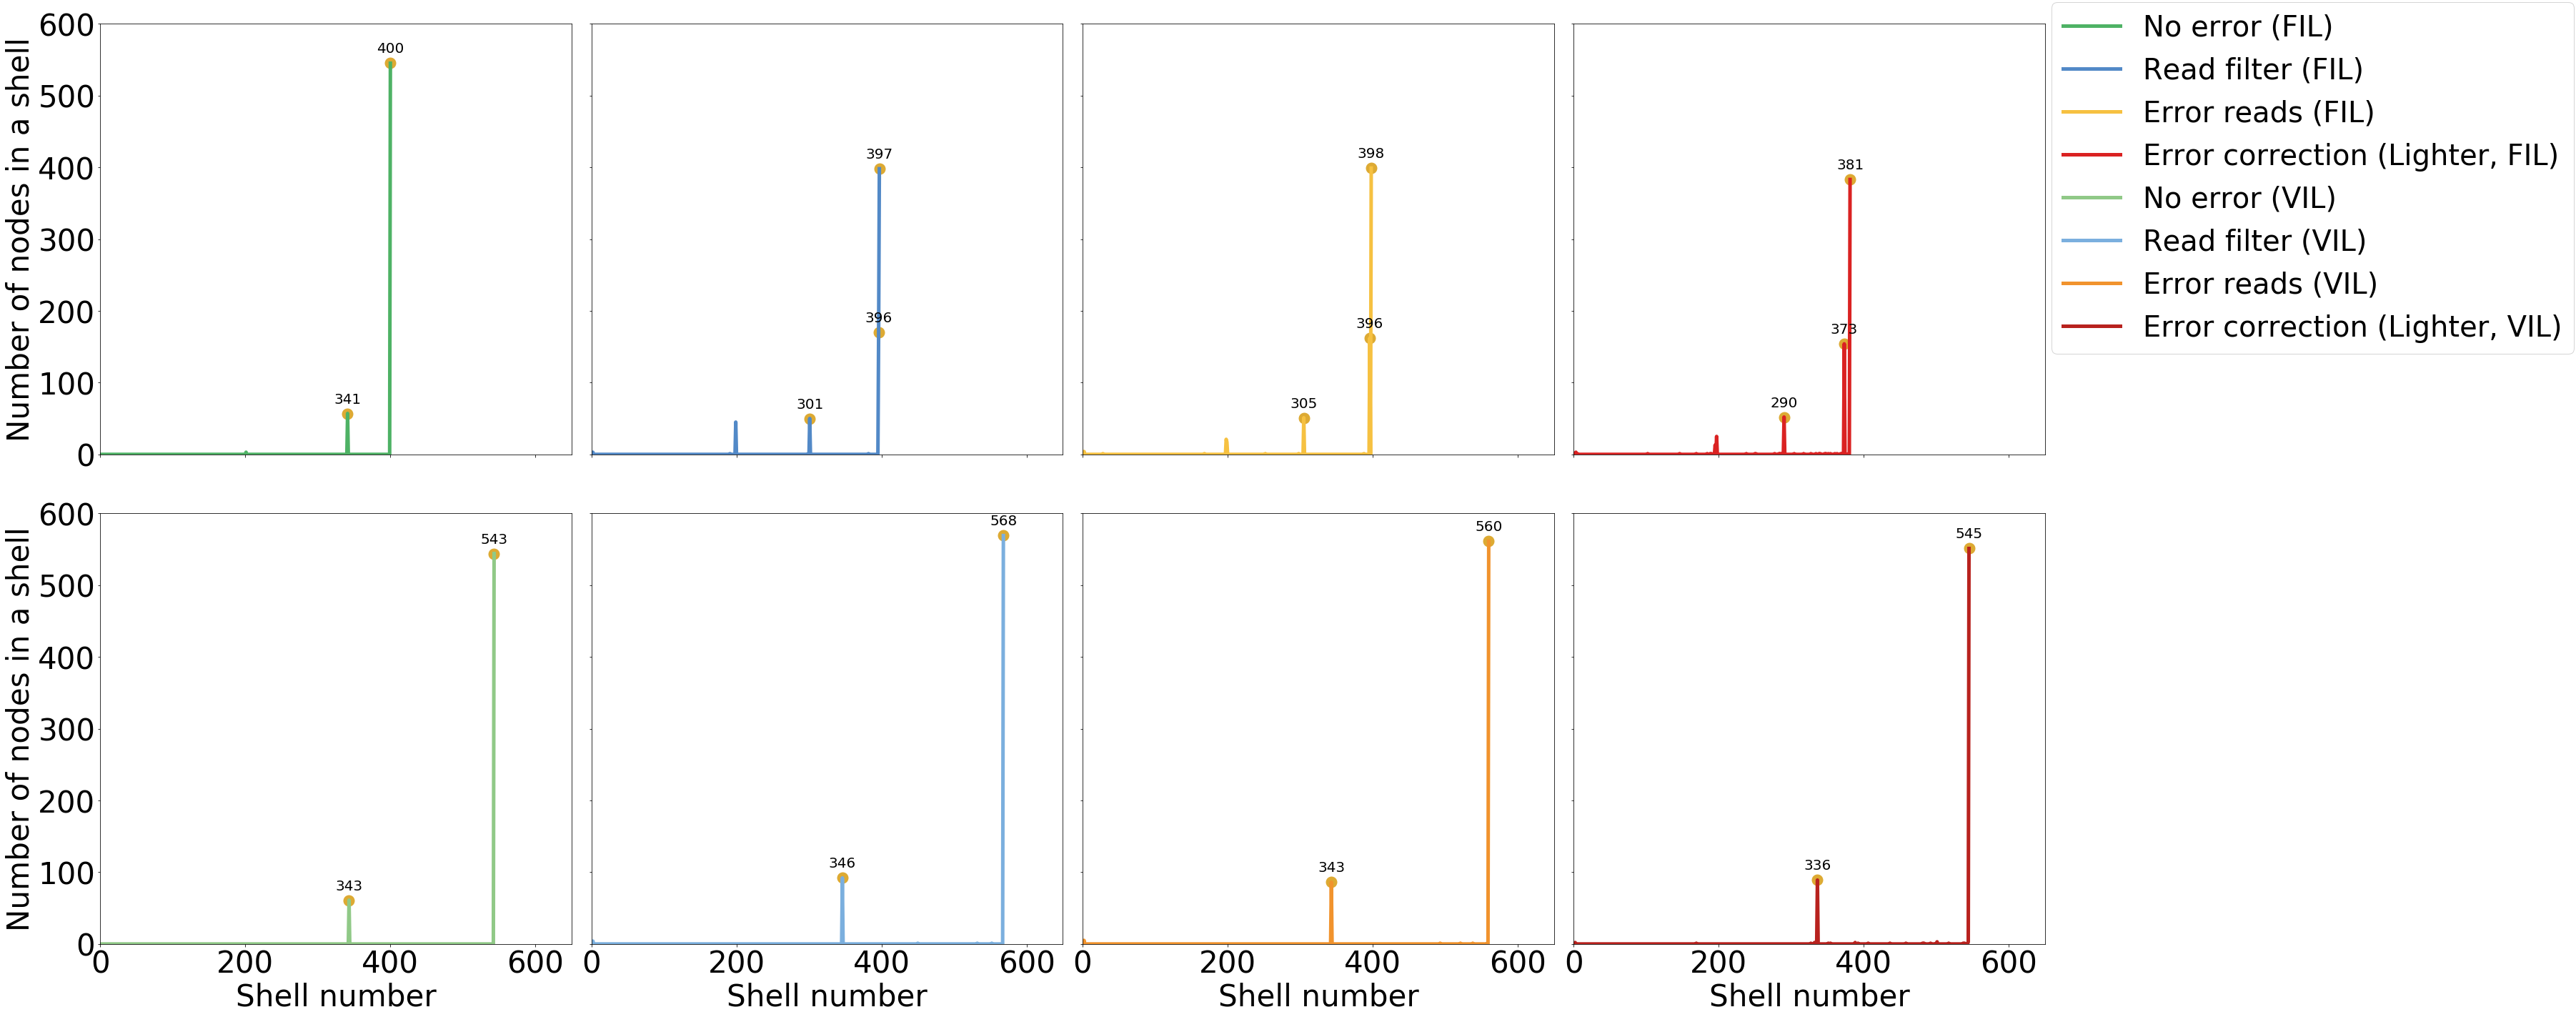

In [27]:
files = ["../Data/1gen2rep_extra_noerr/seq2l_415", "../Data/1gen2rep_extra_filter/seq2l_415", 
         "../Data/1gen2rep_extra_error_1/seq2l_415", "../Data/1gen2rep_extra_cor/seq2l_415",
         "../Data/1gen2rep_extra_noerr_var/seq2l_415", "../Data/1gen2rep_extra_filter_var/seq2l_415", 
         "../Data/1gen2rep_extra_error_var/seq2l_415", "../Data/1gen2rep_extra_cor_var/seq2l_415",]
fig, axes = plt.subplots(2, 4, sharex = True, sharey = True, 
                         figsize=(4 * fig_width, 2 * fig_height,))
h = 5

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0, 0].plot(xs, data, label = "No error (FIL)", linewidth = h, color = '#4eb265')
axes[0, 0].set_ylabel('Number of nodes in a shell')
autolabel_hor(axes[0, 0], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[0, 1].plot(xs, data, label = "Read filter (FIL)", linewidth = h, color = '#5289c7')
autolabel_hor(axes[0, 1], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[0, 2].plot(xs, data, label = "Error reads (FIL)", linewidth = h, color = '#f6c141')
autolabel_hor(axes[0, 2], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = files[3]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[0, 3].plot(xs, data, label = "Error correction (Lighter, FIL)", linewidth = h, color = '#da2222')
autolabel_hor(axes[0, 3], xs, data, 50, 20, 20, 10, "#ddaa33")

fname = files[4]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[1, 0].plot(xs, data, label = "No error (VIL)", linewidth = h, color = '#90c987')
autolabel_hor(axes[1, 0], xs, data, 50, 20, 20, 10, "#ddaa33")
axes[1, 0].set_xlabel('Shell number')
axes[1, 0].set_ylabel('Number of nodes in a shell')

fname = files[5]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[1, 1].plot(xs, data, label = "Read filter (VIL)", linewidth = h, color = '#7bafde')
autolabel_hor(axes[1, 1], xs, data, 50, 20, 20, 10, "#ddaa33")
axes[1, 1].set_xlabel('Shell number')

fname = files[6]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[1, 2].plot(xs, data, label = "Error reads (VIL)", linewidth = h, color = '#f1932d')
autolabel_hor(axes[1, 2], xs, data, 50, 20, 20, 10, "#ddaa33")
axes[1, 2].set_xlabel('Shell number')

fname = files[7]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[1, 3].plot(xs, data, label = "Error correction (Lighter, VIL)", linewidth = h, color = '#b8221e')
autolabel_hor(axes[1, 3], xs, data, 50, 20, 20, 10, "#ddaa33")
axes[1, 3].set_xlabel('Shell number')

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.xlim((0,650))
plt.ylim((0,600))
plt.tight_layout()
fig.savefig("seq2l-fixed-var-error-comp-line-dot.png", bbox_inches = 'tight')
plt.show()

### Figure 3: E. coli backbone 1 genome, 1 repeat

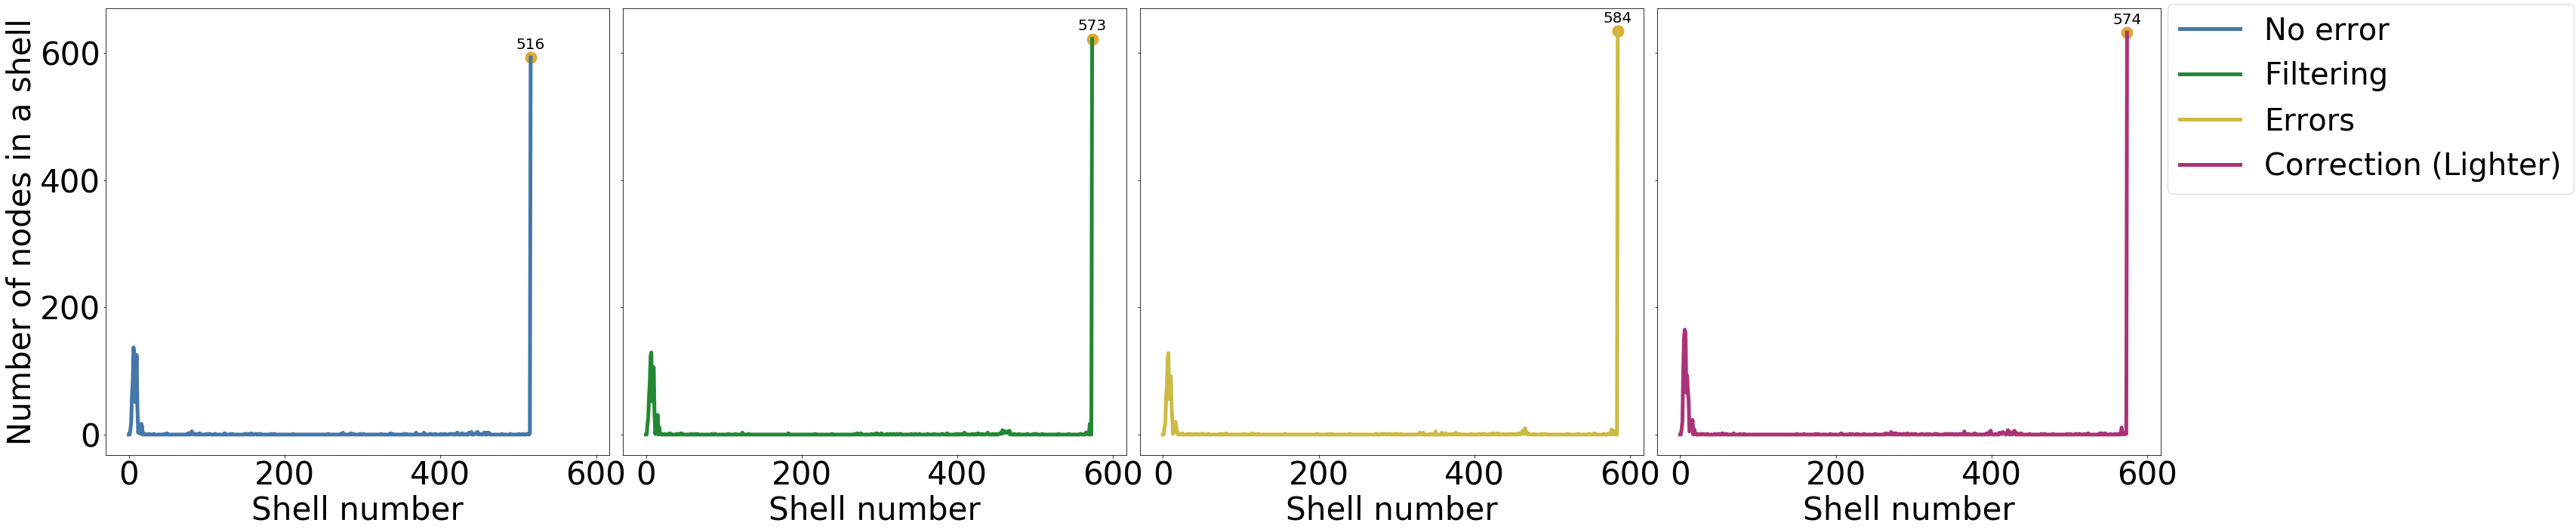

In [28]:
files = ["../Data/ecoli_300_noerr/seq1_42", "../Data/ecoli_300_filter/seq1_42", 
         "../Data/ecoli_300_error/seq1_42", "../Data/ecoli_300_cor/seq1_42"]
fig, axes = plt.subplots(1, 4, figsize = (4 * fig_width, 1 * fig_height), sharex = True, sharey = True)

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "No error", color = '#4477aa', linewidth = 5.)
autolabel_hor(axes[0], xs, data, 200, 20, 20, 10, "#ddaa33")
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "Filtering", color = '#228833', linewidth = 5.)
autolabel_hor(axes[1], xs, data, 200, 20, 20, 10, "#ddaa33")
axes[1].set_xlabel('Shell number')

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[2].plot(xs, data, label = "Errors", color = '#ccbb44', linewidth = 5.)
autolabel_hor(axes[2], xs, data, 200, 20, 20, 10, "#ddaa33")
axes[2].set_xlabel('Shell number')

fname = files[3]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[3].plot(xs, data, label = "Correction (Lighter)", color = '#aa3377', linewidth = 5.)
autolabel_hor(axes[3], xs, data, 200, 20, 20, 10, "#ddaa33")
axes[3].set_xlabel('Shell number')

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-ecoli-1-comp-line-dot.png", bbox_inches = 'tight')
plt.show()

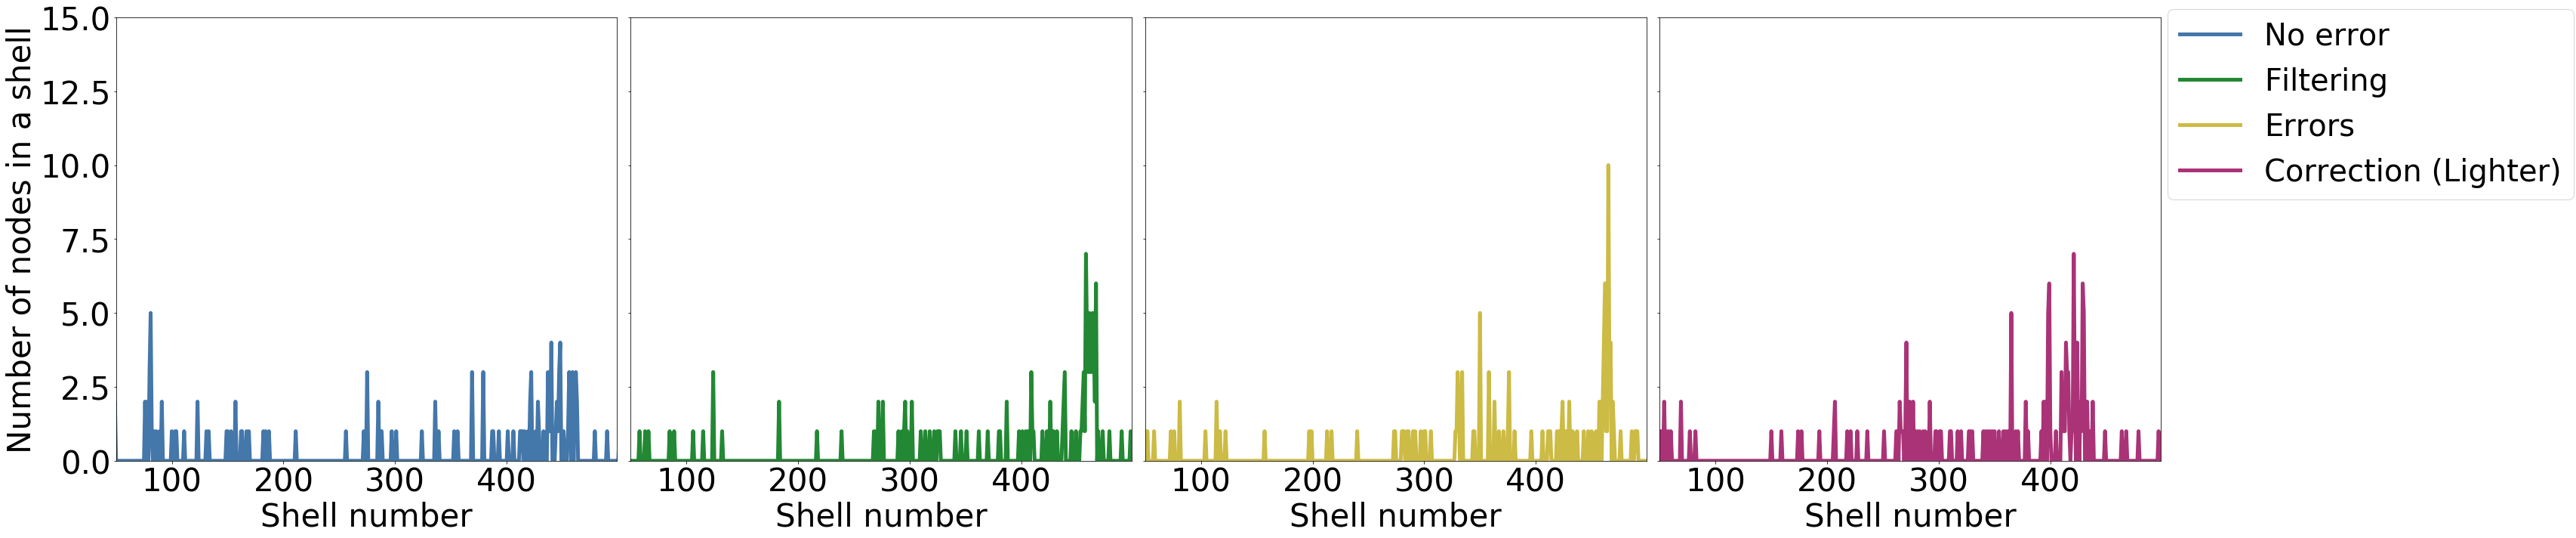

In [29]:
files = ["../Data/ecoli_300_noerr/seq1_42", "../Data/ecoli_300_filter/seq1_42", 
         "../Data/ecoli_300_error/seq1_42", "../Data/ecoli_300_cor/seq1_42"]
fig, axes = plt.subplots(1, 4, figsize = (4 * fig_width, 1 * fig_height), sharex = True, sharey = True)

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "No error", color = '#4477aa', linewidth = 5.)
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "Filtering", color = '#228833', linewidth = 5.)
axes[1].set_xlabel('Shell number')

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[2].plot(xs, data, label = "Errors", color = '#ccbb44', linewidth = 5.)
axes[2].set_xlabel('Shell number')

fname = files[3]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[3].plot(xs, data, label = "Correction (Lighter)", color = '#aa3377', linewidth = 5.)
axes[3].set_xlabel('Shell number')

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.xlim((50,499))
plt.ylim((0,15))
plt.tight_layout()
fig.savefig("shell-size-ecoli-1-comp-line-dot-zoom.png", bbox_inches = 'tight')
plt.show()

### Figure 4: E. coli and B. cereus dataset

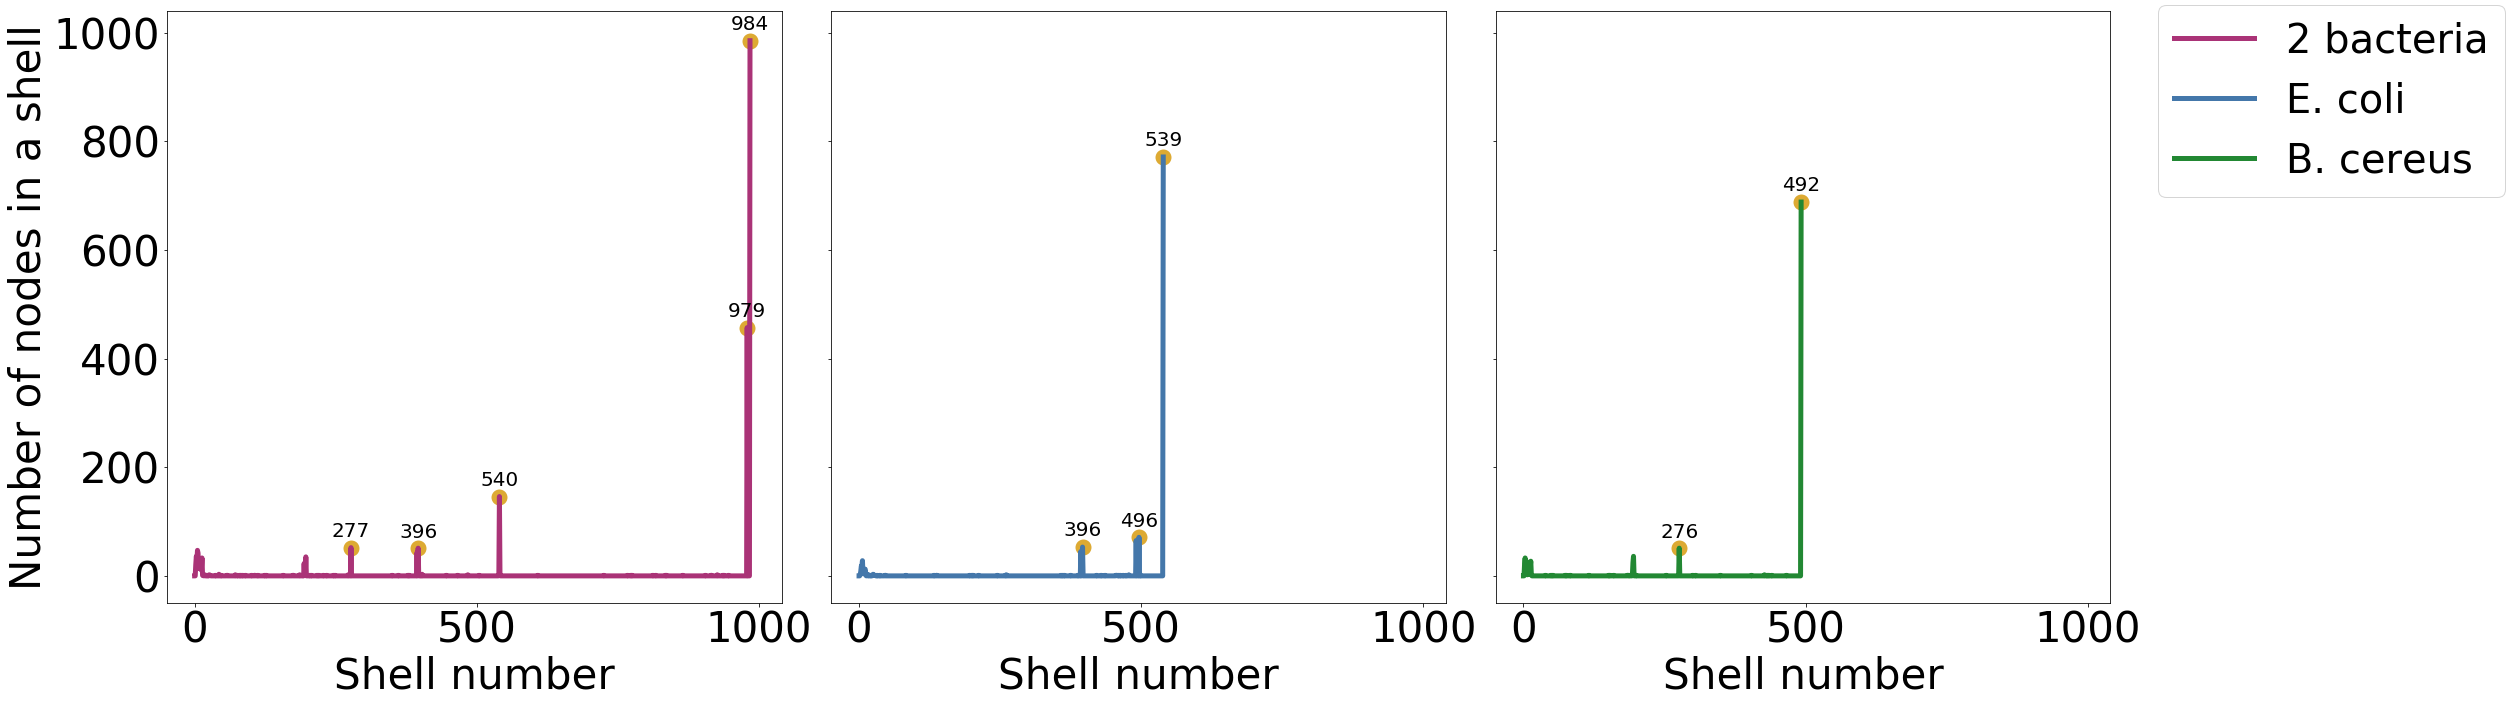

In [156]:
files = ["../Data/2bact_noerr/seq1_42", "../Data/2bact_noerr/seq2_42", "../Data/2bact_noerr/2bact_42",]
fig, axes = plt.subplots(1, 3, figsize = (3 * fig_width, fig_height), sharex = True, sharey = True)
h = 5.

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])
dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "2 bacteria", color = '#aa3377', linewidth = h)
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')
autolabel_hor(axes[0], xs, data, 50, 30, 20, 10, "#ddaa33")

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])
dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "E. coli", color = '#4477aa', linewidth = h)
axes[1].set_xlabel('Shell number')
data[491] = 0
autolabel_hor(axes[1], xs, data, 50, 30, 20, 10, "#ddaa33")

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])
dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[2].plot(xs, data, label = "B. cereus", color = '#228833', linewidth = h)
axes[2].set_xlabel('Shell number')
autolabel_hor(axes[2], xs, data, 50, 30, 20, 10, "#ddaa33")

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-2bact-comp-line-dot.png", bbox_inches = 'tight')
plt.show()

### Figure 5: E. coli and B. cereus repeat type validation

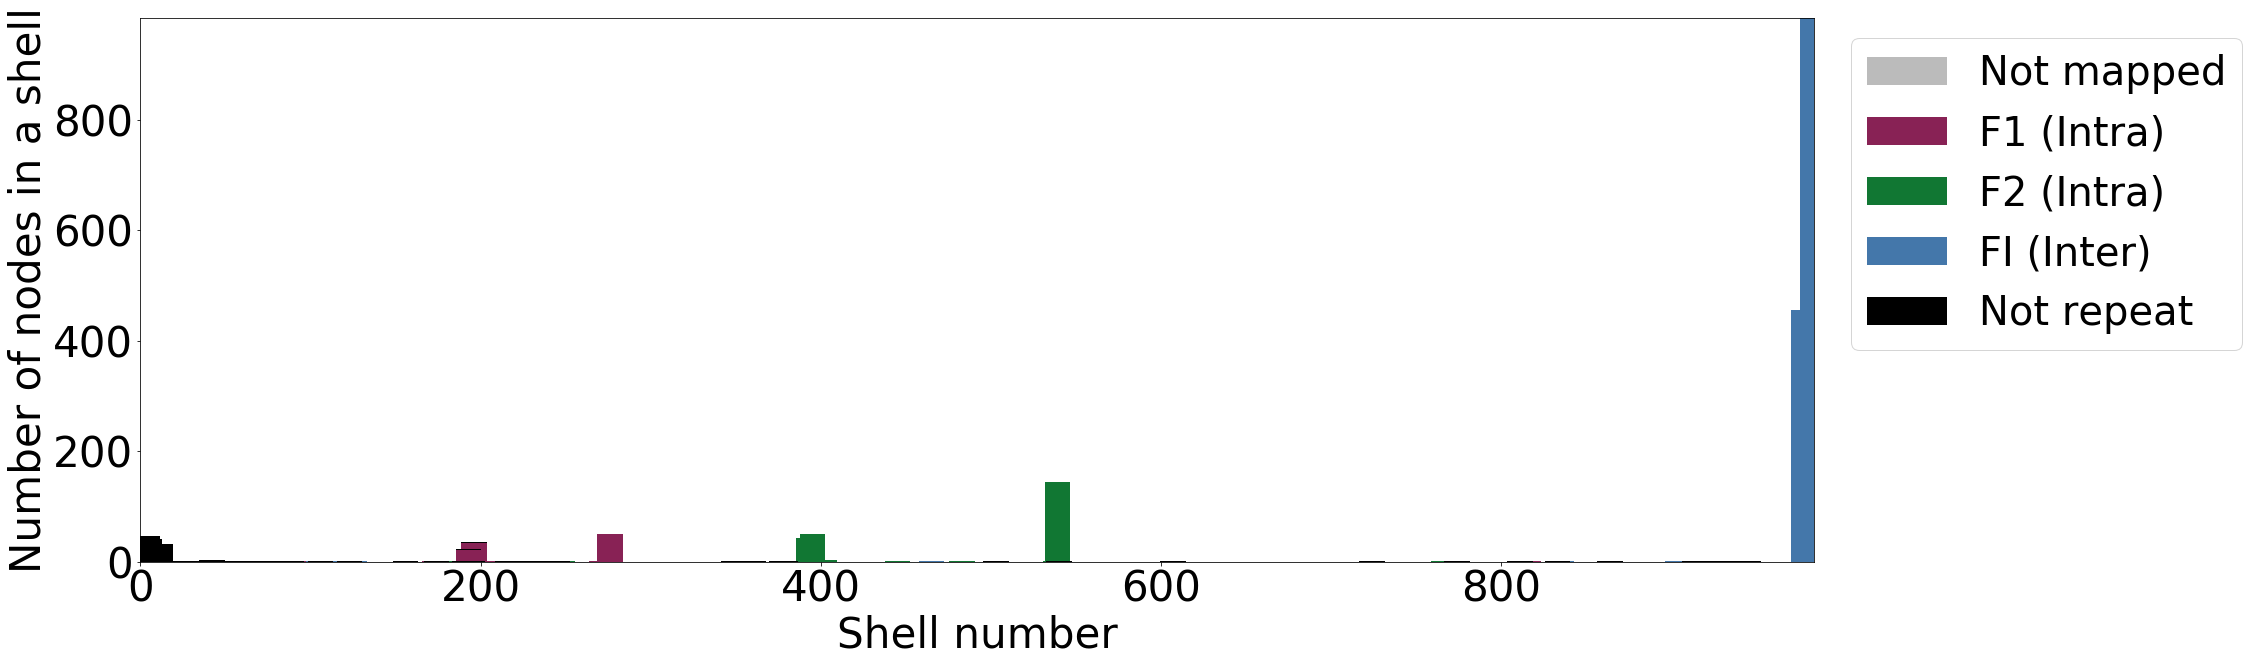

In [229]:
plt.subplots(figsize = (3 * fig_width, fig_height))
fname = "../Data/2bact_noerr/2bact_42"
first_shell = 0
last_shell = len(dataset[fname]) - 1

w = 15.

xs = np.arange(first_shell, last_shell)

data0 = np.asarray(dataset_sizes_types[fname][0][first_shell:last_shell])
plt.bar(xs, data0, label = "Not mapped", width = w, color = "#bbbbbb")
data4 = np.asarray(dataset_sizes_types[fname][4][first_shell:last_shell])
plt.bar(xs, data4, bottom = data0 , label = "F1 (Intra)", color = "#882255", width = w)
data5 = np.asarray(dataset_sizes_types[fname][5][first_shell:last_shell])
plt.bar(xs, data5, bottom = data0 + data4, label = "F2 (Intra)", color = "#117733", width = w)
data6 = np.asarray(dataset_sizes_types[fname][6][first_shell:last_shell])
plt.bar(xs, data6, bottom = data0 + data4 + data5, label = "FI (Inter)", color = "#4477aa", width = w)
data7 = np.asarray(dataset_sizes_types[fname][7][first_shell:last_shell])
plt.bar(xs, data7, bottom = data0 + data4 + data5 + data6, label = "Not repeat", color = 'black', width = w)

plt.xlabel('Shell number')
plt.ylabel('Number of nodes in a shell')
plt.xlim((first_shell, last_shell))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig("shell-size-{}-{}-{}-type-thick-no-R.png".format(fname.split("/")[1], first_shell, last_shell),
            bbox_inches = 'tight')
plt.show()

### 3 Bacteria comparison

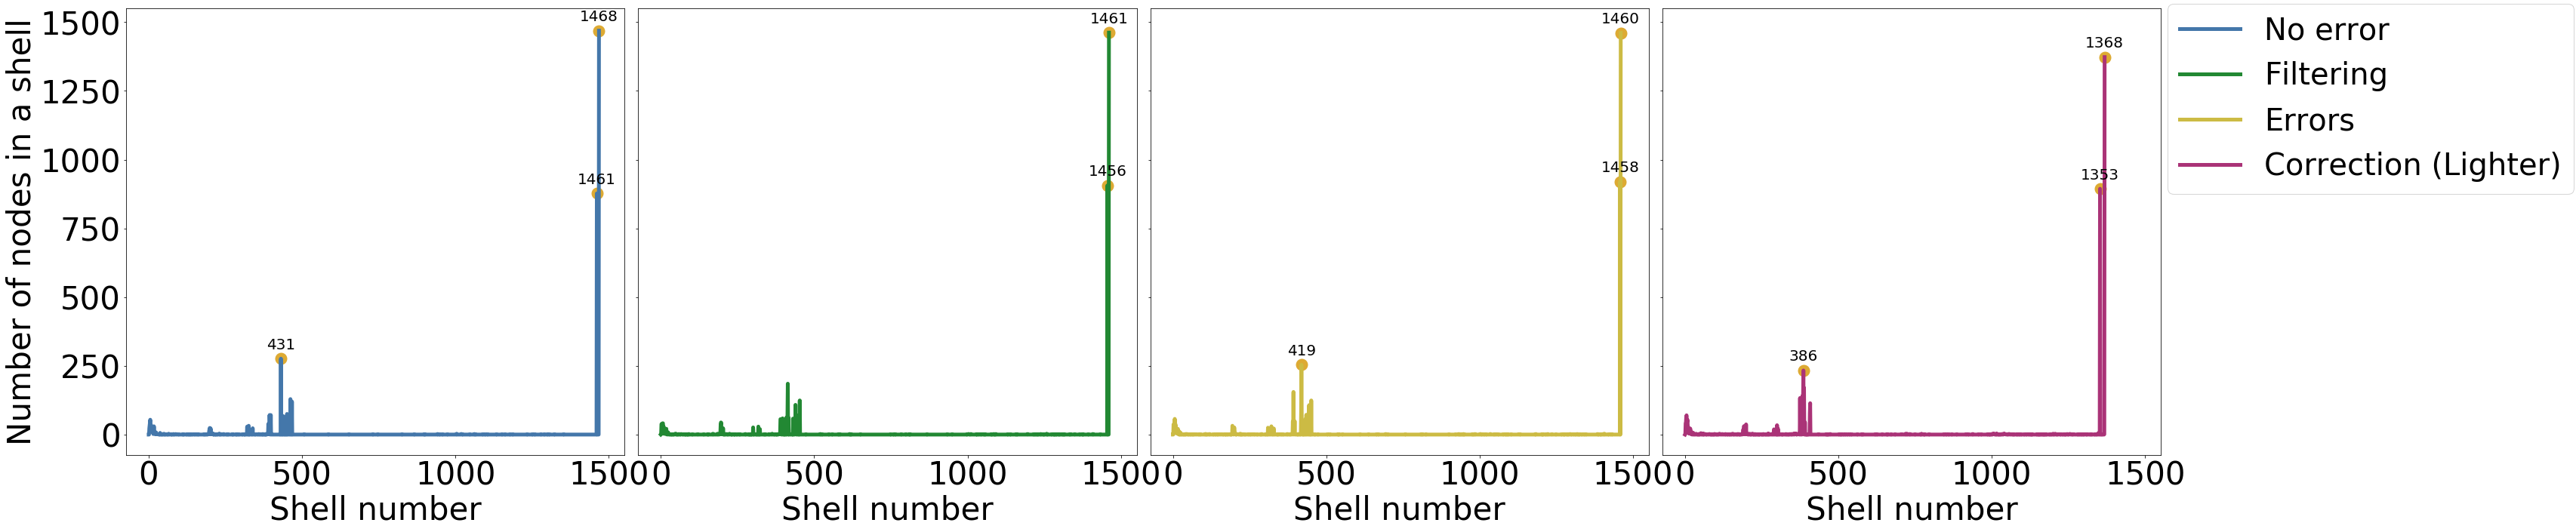

In [145]:
files = ["../Data/3bact_noerr/3bact_42", "../Data/3bact_filter/3bact_42", 
         "../Data/3bact_error/3bact_42", "../Data/3bact_cor/3bact_42"]
fig, axes = plt.subplots(1, 4, figsize = (4 * fig_width, fig_height), sharex = True, sharey = True)

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "No error", color = '#4477aa', linewidth = 5)
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')
autolabel_hor(axes[0], xs, data, 200, 50, 20, 10, "#ddaa33")

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "Filtering", color = '#228833', linewidth = 5)
axes[1].set_xlabel('Shell number')
autolabel_hor(axes[1], xs, data, 200, 50, 20, 10, "#ddaa33")

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[2].plot(xs, data, label = "Errors", color = '#ccbb44', linewidth = 5)
axes[2].set_xlabel('Shell number')
autolabel_hor(axes[2], xs, data, 200, 50, 20, 10, "#ddaa33")

fname = files[3]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[3].plot(xs, data, label = "Correction (Lighter)", color = '#aa3377', linewidth = 5)
axes[3].set_xlabel('Shell number')
autolabel_hor(axes[3], xs, data, 200, 50, 20, 10, "#ddaa33")

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-3bact-comp-line-dot.png", bbox_inches = 'tight')
plt.show()

### 5 E. coli 

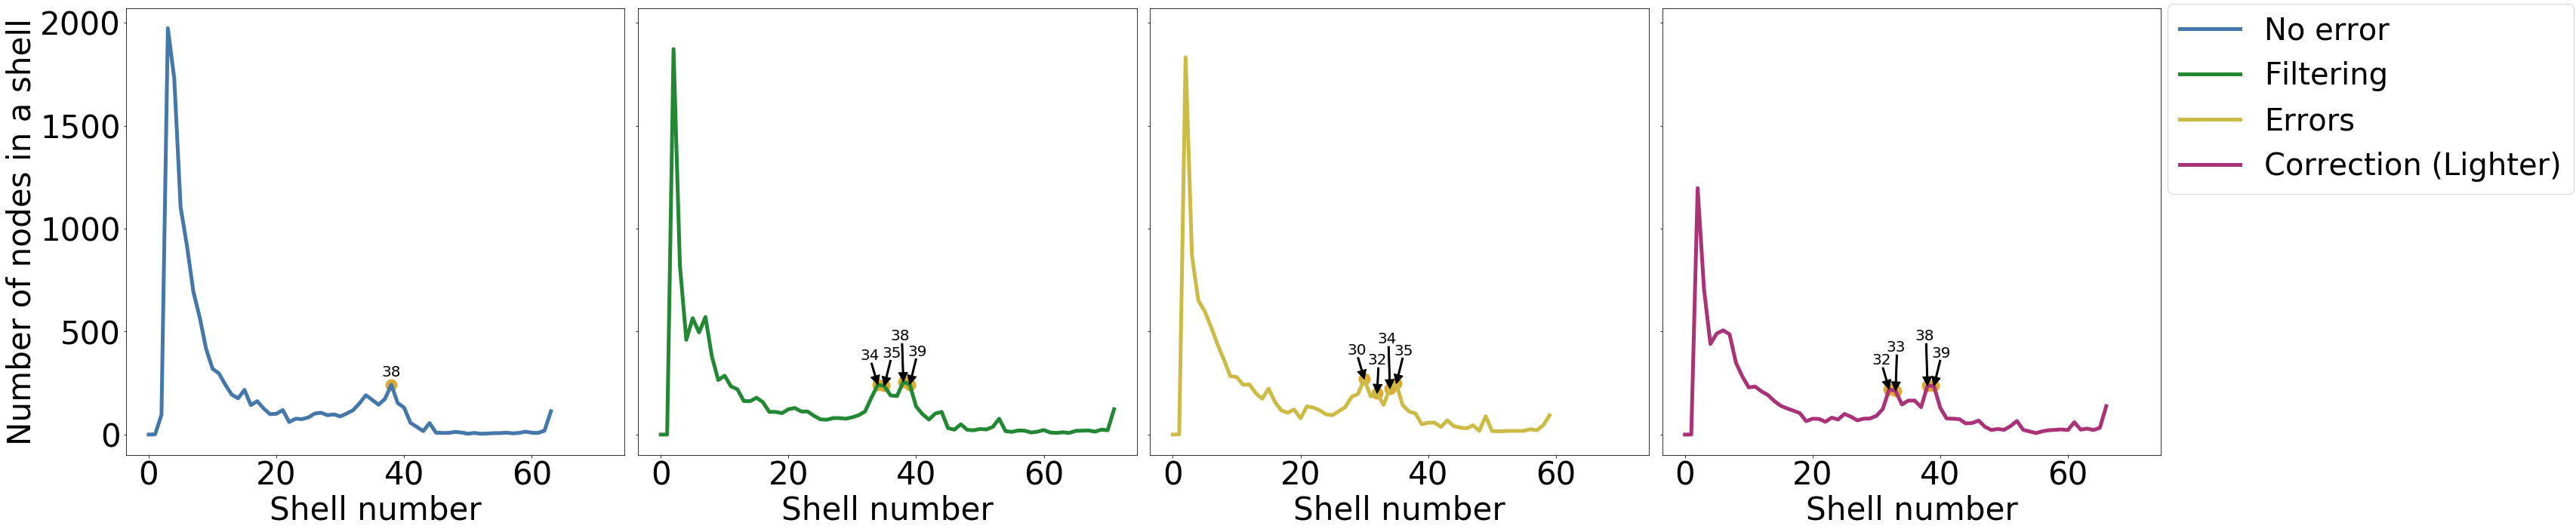

In [227]:
files = ["../Data/ecoli_300_noerr/seq_all_42", "../Data/ecoli_300_filter/seq_all_42", 
         "../Data/ecoli_300_error/seq_all_42", "../Data/ecoli_300_cor/seq_all_42"]
fig, axes = plt.subplots(1, 4, figsize = (4 * fig_width, 1 * fig_height), sharex = True, sharey = True)

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "No error", color = '#4477aa', linewidth = 5)
axes[0].set_xlabel('Shell number')
axes[0].set_ylabel('Number of nodes in a shell')
autolabel_hor(axes[0], xs[20:], data[20:], 200, 60, 20, 10, "#ddaa33")

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "Filtering", color = '#228833', linewidth = 5)
axes[1].set_xlabel('Shell number')
# autolabel_hor(axes[1], xs[20:], data[20:], 200, 60, 20, 10, "#ddaa33")
axes[1].text(xs[34] - 1.2, data[34] + 105,
                "{}".format(xs[34]),
                ha='center', va='bottom', fontsize = 20)
axes[1].annotate("", xy= (xs[34], data[34]), xytext = (xs[34] - 1., data[34] + 105), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[1].scatter(xs[34], data[34], linewidth = 10, color = "#ddaa33")

axes[1].text(xs[35] + 1.2, data[35] + 125,
                "{}".format(xs[35]),
                ha='center', va='bottom', fontsize = 20)
axes[1].annotate("", xy = (xs[35], data[35]), xytext = (xs[35] + 1, data[35] + 125), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[1].scatter(xs[35], data[35], linewidth = 10, color = "#ddaa33")

axes[1].text(xs[38] - .5, data[38] + 185,
                "{}".format(xs[38]),
                ha='center', va='bottom', fontsize = 20)
axes[1].annotate("", xy= (xs[38], data[38]), xytext = (xs[38] - .2, data[38] + 185), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[1].scatter(xs[38], data[38], linewidth = 10, color = "#ddaa33")

axes[1].text(xs[39] + 1.2, data[39] + 125,
                "{}".format(xs[39]),
                ha='center', va='bottom', fontsize = 20)
axes[1].annotate("", xy = (xs[39], data[39]), xytext = (xs[39] + 1, data[39] + 125), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[1].scatter(xs[39], data[39], linewidth = 10, color = "#ddaa33")

fname = files[2]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r3 = axes[2].plot(xs, data, label = "Errors", color = '#ccbb44', linewidth = 5)
axes[2].set_xlabel('Shell number')
# autolabel_hor(axes[2], xs[20:], data[20:], 200, 60, 20, 10, "#ddaa33")

axes[2].text(xs[30] - 1.2, data[30] + 105,
                "{}".format(xs[30]),
                ha='center', va='bottom', fontsize = 20)
axes[2].annotate("", xy= (xs[30], data[30]), xytext = (xs[30] - 1., data[30] + 105), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[2].scatter(xs[30], data[30], linewidth = 10, color = "#ddaa33")

axes[2].text(xs[32] + 0., data[32] + 125,
                "{}".format(xs[32]),
                ha='center', va='bottom', fontsize = 20)
axes[2].annotate("", xy = (xs[32], data[32]), xytext = (xs[32] + .2, data[32] + 125), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[2].scatter(xs[32], data[32], linewidth = 10, color = "#ddaa33")

axes[2].text(xs[34] - .5, data[34] + 205,
                "{}".format(xs[34]),
                ha='center', va='bottom', fontsize = 20)
axes[2].annotate("", xy= (xs[34], data[34]), xytext = (xs[34] - .2, data[34] + 205), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[2].scatter(xs[34], data[34], linewidth = 10, color = "#ddaa33")

axes[2].text(xs[35] + 1.2, data[35] + 125,
                "{}".format(xs[35]),
                ha='center', va='bottom', fontsize = 20)
axes[2].annotate("", xy = (xs[35], data[35]), xytext = (xs[35] + 1, data[35] + 125), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[2].scatter(xs[35], data[35], linewidth = 10, color = "#ddaa33")

fname = files[3]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r4 = axes[3].plot(xs, data, label = "Correction (Lighter)", color = '#aa3377', linewidth = 5)
axes[3].set_xlabel('Shell number')

axes[3].text(xs[32] - 1.2, data[32] + 105,
                "{}".format(xs[32]),
                ha='center', va='bottom', fontsize = 20)
axes[3].annotate("", xy= (xs[32], data[32]), xytext = (xs[32] - 1., data[32] + 105), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[3].scatter(xs[32], data[32], linewidth = 10, color = "#ddaa33")

axes[3].text(xs[33] + 0., data[33] + 175,
                "{}".format(xs[33]),
                ha='center', va='bottom', fontsize = 20)
axes[3].annotate("", xy = (xs[33], data[33]), xytext = (xs[33] + .2, data[33] + 175), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[3].scatter(xs[33], data[33], linewidth = 10, color = "#ddaa33")

axes[3].text(xs[38] - .5, data[38] + 205,
                "{}".format(xs[38]),
                ha='center', va='bottom', fontsize = 20)
axes[3].annotate("", xy= (xs[38], data[38]), xytext = (xs[38] - .2, data[38] + 205), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[3].scatter(xs[38], data[38], linewidth = 10, color = "#ddaa33")

axes[3].text(xs[39] + 1.2, data[39] + 125,
                "{}".format(xs[39]),
                ha='center', va='bottom', fontsize = 20)
axes[3].annotate("", xy = (xs[39], data[39]), xytext = (xs[39] + 1, data[39] + 125), color = "k",
                 arrowprops=dict(width=2,color='k'))
axes[3].scatter(xs[39], data[39], linewidth = 10, color = "#ddaa33")

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-ecoli-all-comp-line-dot.png", bbox_inches = 'tight')
plt.show()

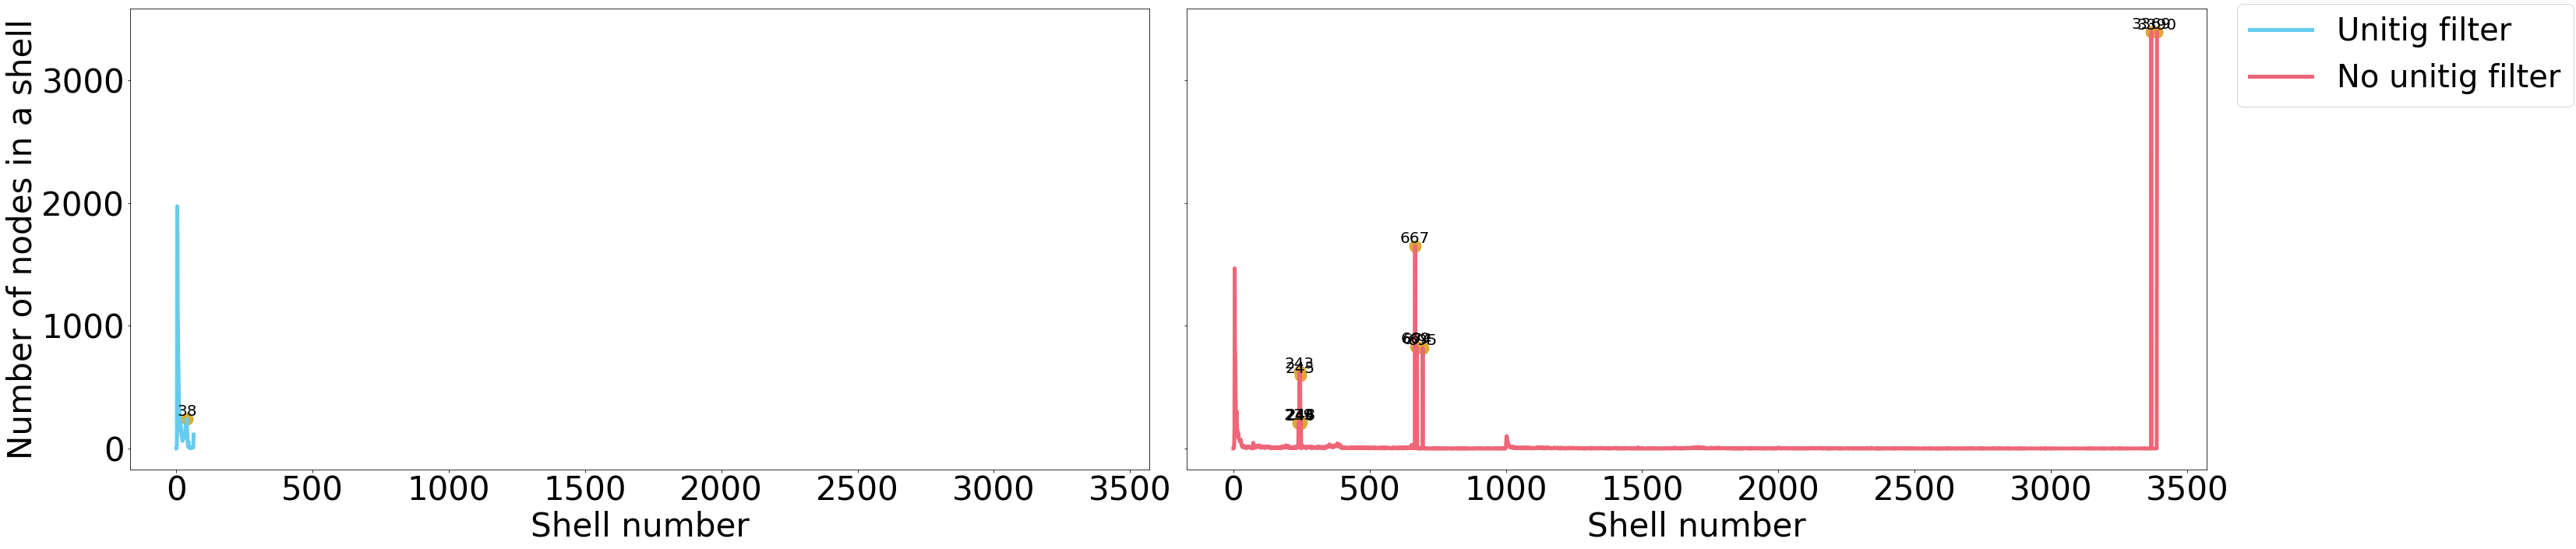

In [165]:
files = ["../Data/ecoli_300_noerr/seq_all_42", "../Data/ecoli_no_unitig_filter/seq_all_42"]
fig, axes = plt.subplots(1, 2, figsize = (4 * fig_width, fig_height), sharex = True, sharey = True)

h = 5

fname = files[0]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r1 = axes[0].plot(xs, data, label = "Unitig filter", color = '#66ccee', linewidth = h)
axes[0].set_ylabel('Number of nodes in a shell')
axes[0].set_xlabel('Shell number')
autolabel_hor(axes[0], xs[20:], data[20:], 200, 60, 20, 10, "#ddaa33")

fname = files[1]
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)

r2 = axes[1].plot(xs, data, label = "No unitig filter", color = '#ee6677', linewidth = h)
axes[1].set_xlabel('Shell number')
autolabel_hor(axes[1], xs[20:], data[20:], 200, 60, 20, 10, "#ddaa33")

fig.legend(bbox_to_anchor=(.99, 1), loc='upper left')
plt.tight_layout()
fig.savefig("shell-size-ecoli-all-comp-unitig-filter-line-dot.png", bbox_inches = 'tight')
plt.show()

### E.coli + B.cereus + 50x500

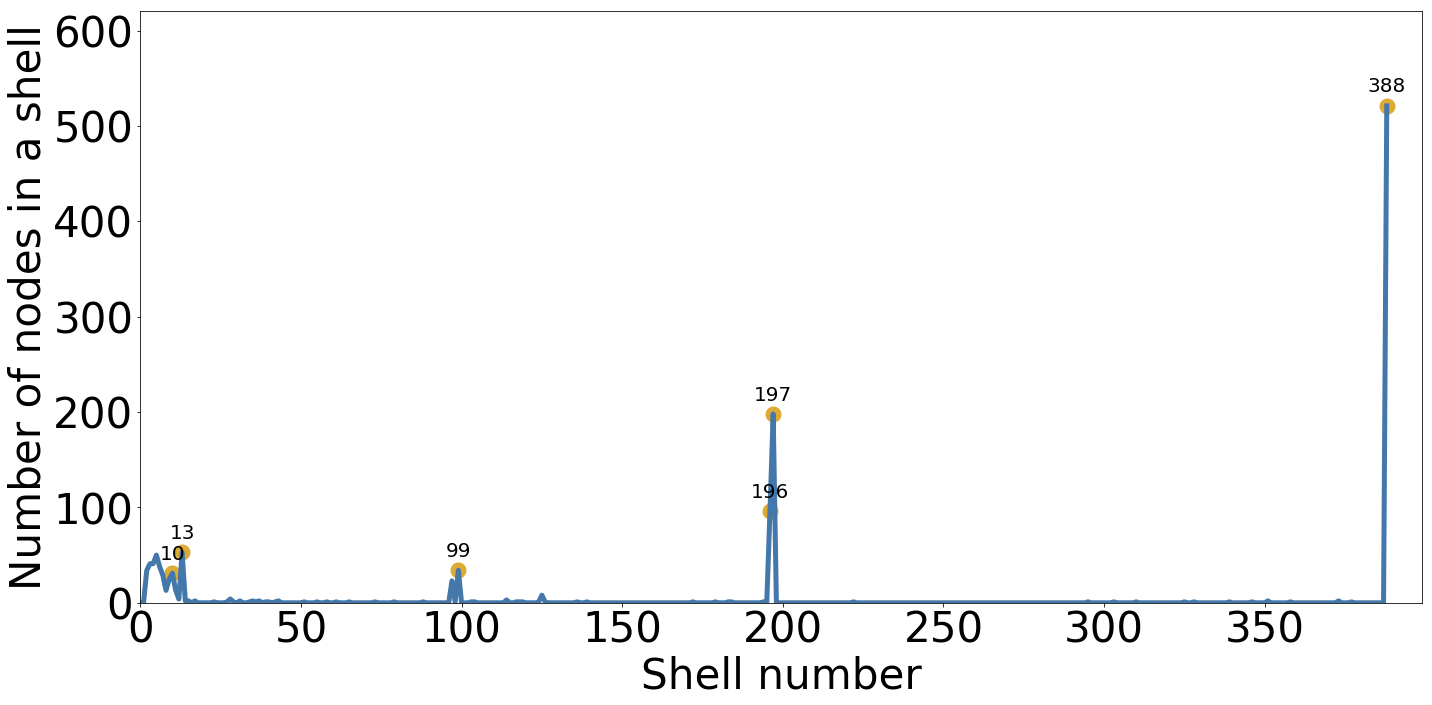

In [179]:
fname = "../Data/2bact_2/2bact_42"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = np.asarray(dataset_sizes[fname][first_shell:last_shell])
xs = np.arange(first_shell, last_shell)

threshold = 40
indices = np.nonzero(data >= threshold)[0]
indices = indices[indices >= 50]

plt.subplots(figsize = (20,10))
plt.plot(xs, data, label = "2 bacteria", linewidth = 5., color = "#4477aa")
autolabel_hor(plt.gca(), xs[10:], data[10:], 30, 20, 20, 10, "#ddaa33")

plt.xlabel('Shell number')
plt.ylabel('Number of nodes in a shell')
plt.xlim((first_shell, last_shell + 10))
plt.ylim((0,np.max(data)+100))
plt.tight_layout()
plt.savefig("shell-size-{}-line-dot.png".format(fname.split("/")[1]))
plt.show()

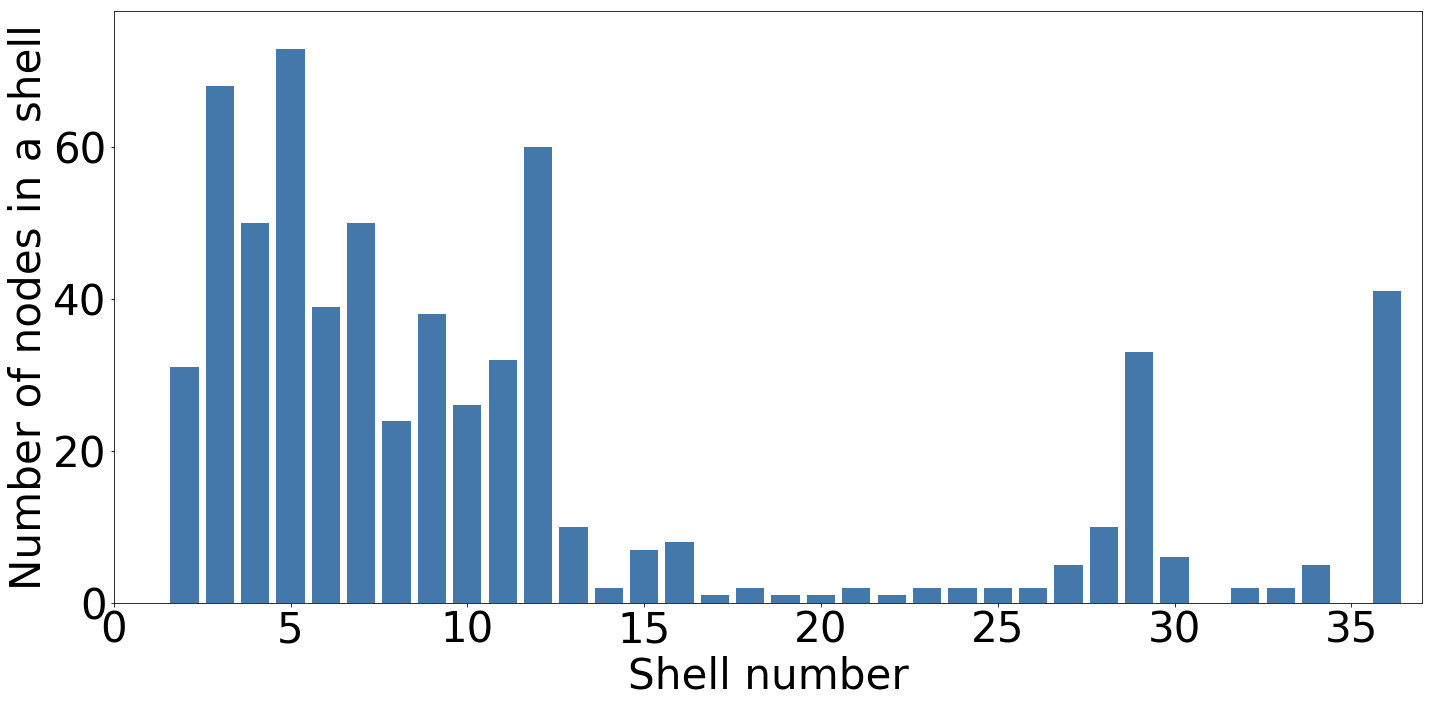

In [183]:
fname = "../Data/2bact_2/2bact_clean_42"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = np.asarray(dataset_sizes[fname][first_shell:last_shell])
xs = np.arange(first_shell, last_shell)

plt.subplots(figsize = (20,10))
plt.bar(xs, data, label = "2 bacteria", linewidth = 5., color = "#4477aa")
# autolabel_hor(plt.gca(), xs[10:], data[10:], 30, 20, 20, 10, "#ddaa33")

plt.xlabel('Shell number')
plt.ylabel('Number of nodes in a shell')
plt.xlim((first_shell,last_shell))
plt.ylim((0,np.max(data)+5))
plt.tight_layout()
plt.savefig("shell-size-{}-bar.png".format(fname.split("/")[1]))
plt.show()

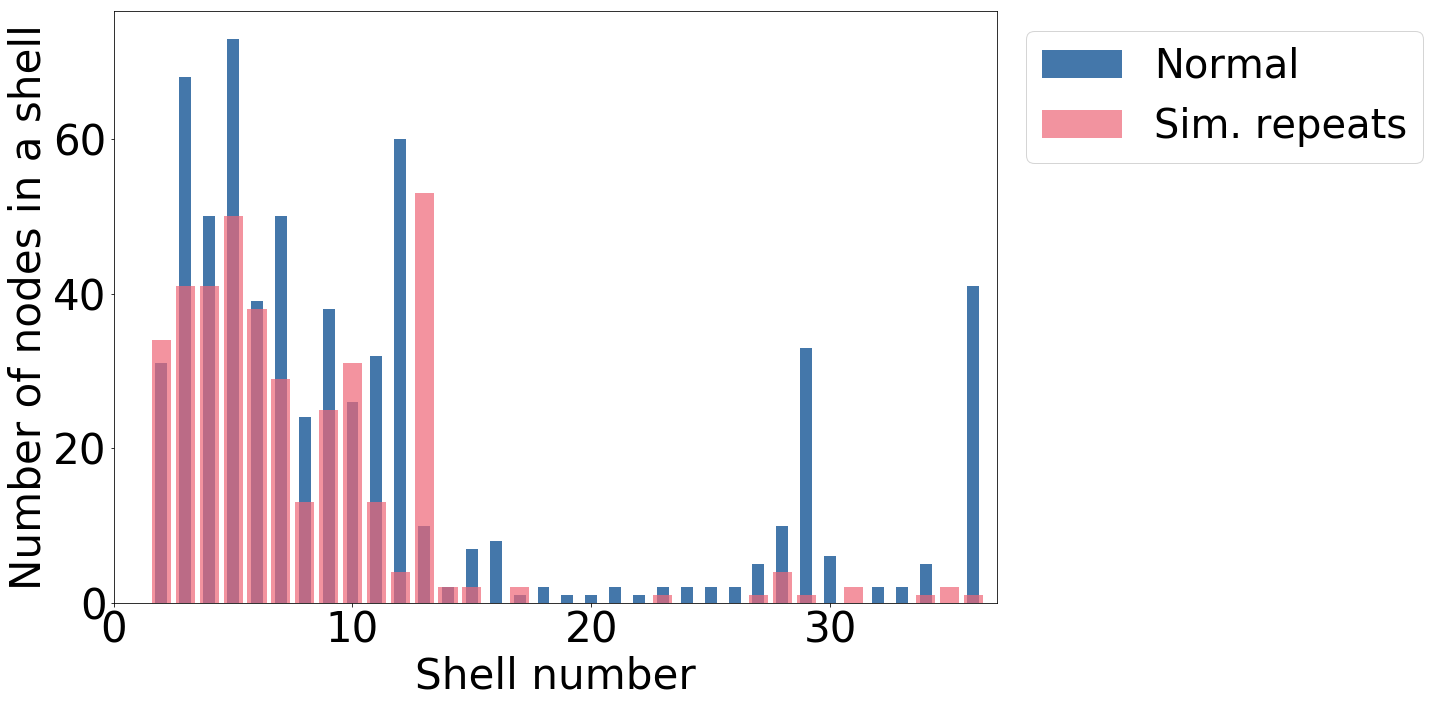

In [189]:
plt.subplots(figsize = (20,10))
fname = "../Data/2bact_2/2bact_clean_42"
first_shell = 0
last_shell = 37

data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)
plt.bar(xs, data, label = "Normal", width = 0.5, color = '#4477aa')

fname = "../Data/2bact_2/2bact_42"
first_shell = 0
last_shell = 37

dataset_sizes[fname][0] = 0
data = dataset_sizes[fname][first_shell:last_shell]
xs = np.arange(first_shell, last_shell)
plt.bar(xs, data, label = "Sim. repeats", color = '#ee6677', alpha = 0.7)

plt.xlabel('Shell number')
plt.ylabel('Number of nodes in a shell')
plt.xlim((first_shell, last_shell))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig("shell-size-{}-{}-{}-background-comp-bar.png".format(fname.split("/")[1], first_shell, last_shell))
plt.show()

## Section 2: Real data

### Shakya (k-mer filter, no unitig filter)

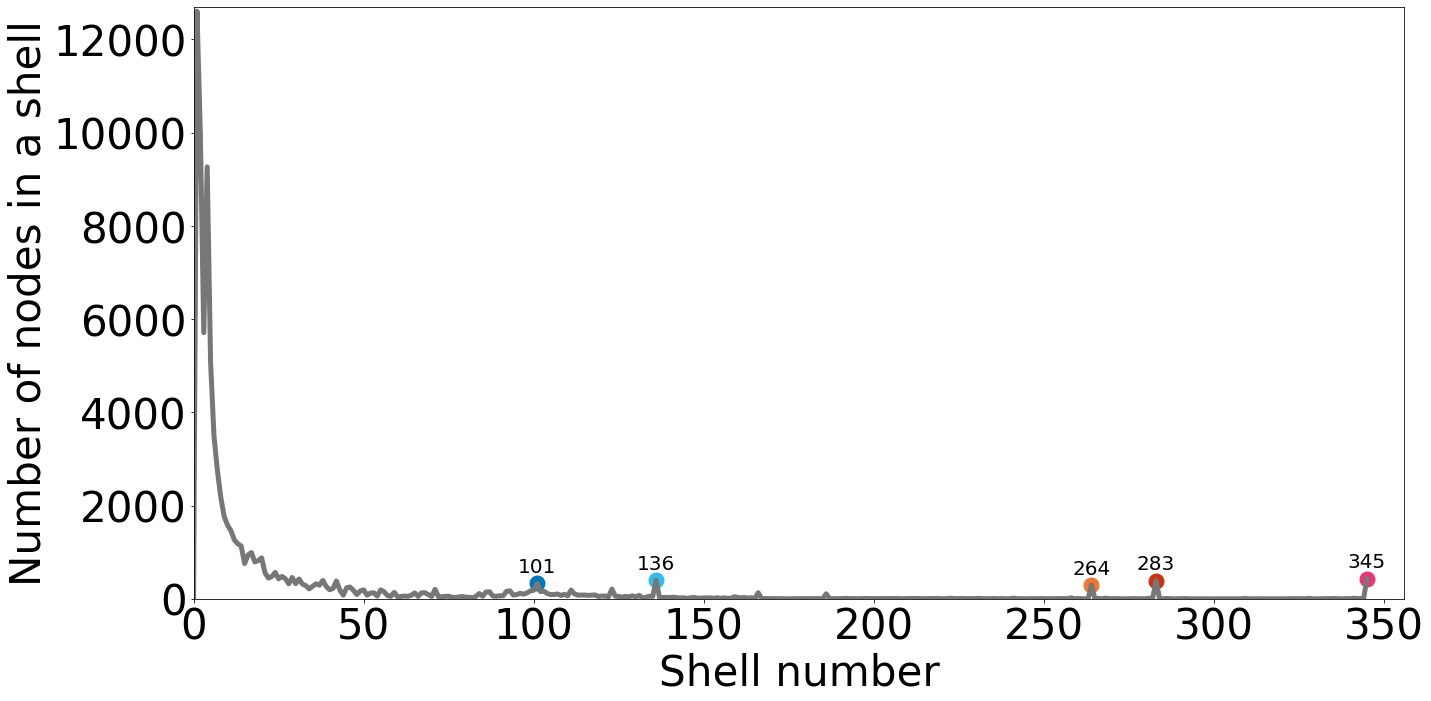

In [27]:
fname = "../Data/shakya/SRR606249_nouni"
first_shell = 0
last_shell = len(dataset[fname])

dataset_sizes[fname][0] = 0
data = np.asarray(dataset_sizes[fname][first_shell:last_shell])
xs = np.arange(first_shell, last_shell)

threshold = 500
indices = np.nonzero(data >= threshold)[0]
indices = indices[indices >= 50]

plt.subplots(figsize = (20,10))
plt.plot(xs, data, label = "Shakya", linewidth = 5., color = "#777777")
autolabel_hor(plt.gca(), xs[50:120], data[50:120], 250, 350, 20, 10, '#0077BB')
autolabel_hor(plt.gca(), xs[120:200], data[120:200], 250, 350, 20, 10, '#33BBEE')
autolabel_hor(plt.gca(), xs[200:270], data[200:270], 250, 350, 20, 10, '#EE7733')
autolabel_hor(plt.gca(), xs[270:300], data[270:300], 250, 350, 20, 10, '#CC3311')
autolabel_hor(plt.gca(), xs[300:], data[300:], 250, 350, 20, 10, '#EE3377')

plt.xlabel('Shell number')
plt.ylabel('Number of nodes in a shell')
plt.xlim((first_shell, last_shell + 10))
plt.ylim((0,np.max(data)+100))
plt.tight_layout()
plt.savefig("shell-size-{}-line-dot-color.png".format(fname.split("/")[1]))
plt.show()